### 1. A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:xlabel='Sales'>

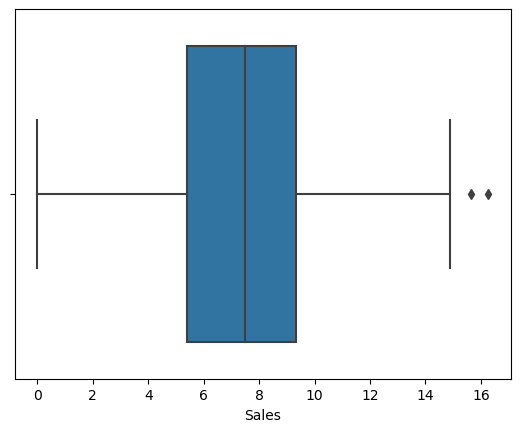

In [6]:
sns.boxplot(company["Sales"])

In [7]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
company.Sales=company.Sales.apply(split)

<AxesSubplot:>

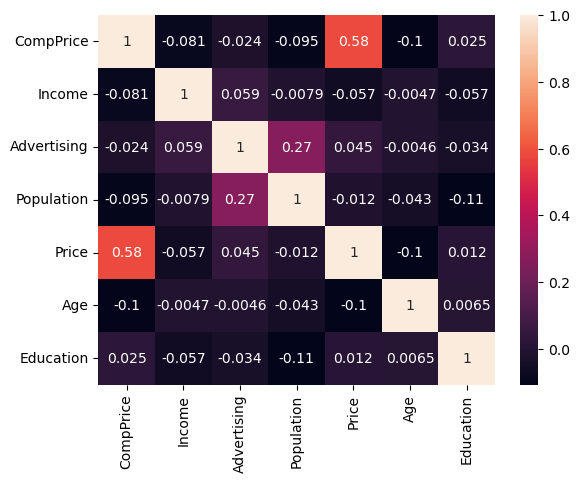

In [8]:
sns.heatmap(company.corr(),annot=True)

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,Good,33,14,Yes,Yes
396,average sale,139,23,3,37,120,Medium,55,11,No,Yes
397,average sale,162,26,12,368,159,Medium,40,18,Yes,Yes
398,average sale,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
le = LabelEncoder()

In [11]:
company["ShelveLoc"]=le.fit_transform(company["ShelveLoc"])
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,0,42,17,1,1
1,high sale,111,48,16,260,83,1,65,10,1,1
2,high sale,113,35,10,269,80,2,59,12,1,1
3,average sale,117,100,4,466,97,2,55,14,1,1
4,low sale,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,1,33,14,1,1
396,average sale,139,23,3,37,120,2,55,11,0,1
397,average sale,162,26,12,368,159,2,40,18,1,1
398,average sale,100,79,7,284,95,0,50,12,1,1


In [13]:
y = company.iloc[:,0]
x = company.iloc[:,1:11]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
model = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=40)

In [16]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=40)

In [17]:
pred = model.predict(x_test)
pred

array(['average sale', 'average sale', 'average sale', 'high sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'high sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'low sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'average sale', 'average sale', 'average sale',
       'average sale', 'high sale', 'low sale', 'average sale',
       'average sale', 

In [18]:
confusion_matrix(y_test, pred)

array([[40,  0,  0],
       [16,  4,  0],
       [17,  0,  3]], dtype=int64)

In [19]:
accuracy_score(y_test, pred)

0.5875

In [20]:
cross_val_score(model, x_train, y_train, cv=10)

array([0.6875 , 0.65625, 0.6875 , 0.65625, 0.625  , 0.625  , 0.6875 ,
       0.6875 , 0.6875 , 0.59375])

In [21]:
model.feature_importances_

array([0.09836205, 0.09207963, 0.09972525, 0.08004434, 0.23114917,
       0.17554909, 0.13617248, 0.05552706, 0.00977008, 0.02162085])

In [22]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

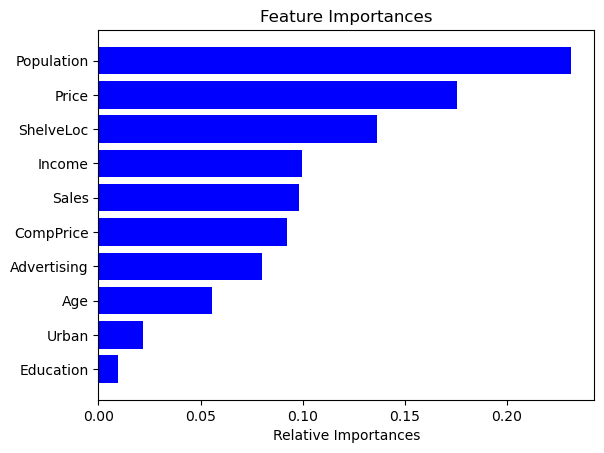

In [23]:
features = company.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

### 2. Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [25]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [26]:
fraud = fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})

In [27]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [28]:
fraud.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [29]:
def split(num):
    if num <30000:
        return  'Risky'
    else:
        return 'Good'
fraud.taxable_income=fraud.taxable_income.apply(split) 

In [30]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [31]:
le=LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud['marital_status'] = le.fit_transform(fraud['marital_status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])

In [32]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


<AxesSubplot:>

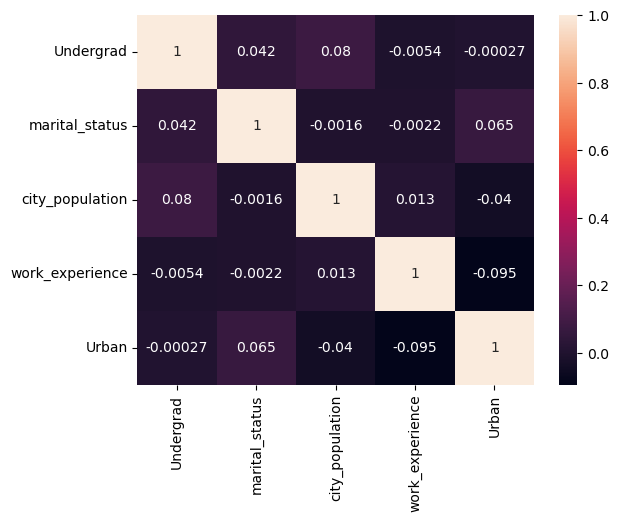

In [33]:
sns.heatmap(fraud.corr(),annot=True)

In [34]:
x = fraud.iloc[:,fraud.columns!="taxable_income"]
y = fraud["taxable_income"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=36)

In [36]:
model = RandomForestClassifier(criterion="entropy",max_depth=9)

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [38]:
pred = model.predict(x_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [39]:
confusion_matrix(y_test, pred)

array([[134,   4],
       [ 40,   2]], dtype=int64)

In [40]:
accuracy_score(y_test, pred)

0.7555555555555555

In [41]:
cross_val_score(model, x_train, y_train, cv=10)

array([0.80952381, 0.80952381, 0.80952381, 0.80952381, 0.83333333,
       0.80952381, 0.76190476, 0.80952381, 0.78571429, 0.73809524])